In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [3]:
#memanggil file
path = '/content/drive/MyDrive/Dataset/Iris.csv'
df = pd.read_csv(path)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#menghapus kolom id
df = df.drop(columns='Id')

In [5]:
#melakukan one hot encoding karena label kita merupakan data kategorikal
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [6]:
#menggabungkan kolom hasil one hot encoding dan membuang kolom spesies
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [7]:
#konversi dataframe tersebut menjadi numpy array
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [8]:
#memisahkan antara atribut dan labe
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:, 0:4]
# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]

In [9]:
#normalisasi data agar data dapat dipelajari dengan baik oleh jst
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [10]:
#pembagian data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3)

In [20]:
#arsitektur model kita kali mini menggunakan 3 buah layer.
model = Sequential([
                    Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dense(3, activation='softmax'),])

In [21]:
#menentukan optimizer dan loss function dari model
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
#melatih data dengan fungsi fit
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0914 - accuracy: 0.3524
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0450 - accuracy: 0.6571
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0093 - accuracy: 0.6857
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9759 - accuracy: 0.6857
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9455 - accuracy: 0.6857
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9145 - accuracy: 0.6857
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8827 - accuracy: 0.6857
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8485 - accuracy: 0.6857
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8132 - accuracy: 0.6857
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7780 - accuracy: 0.6857
Epoch 11/100
4/4 [===========

In [23]:
#menguji akurasi predict
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.1354 - accuracy: 0.9333


[0.1354028880596161, 0.9333333373069763]

In [24]:
#melihat proses keselurhan pembelajaran plot loss dan akurasi
import matplotlib.pyplot as plt

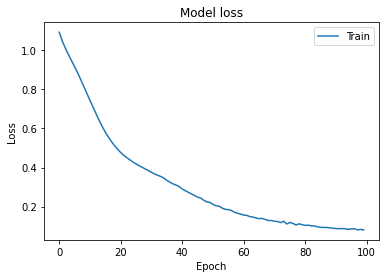

In [25]:
#membuat plot akurasi atau loss dari model (Model Loss)
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

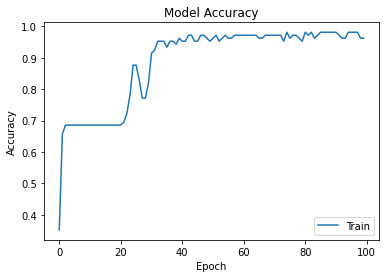

In [26]:
#membuat plot akurasi atau loss dari model (Model Akurasi)
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()